<a href="https://colab.research.google.com/github/blandersonw/CNN_Learning_and_Practice/blob/main/MultiClass_Image_Classification_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model 

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"X_train shape {X_train.shape} and y_train shape {y_train.shape}")

X_train shape (50000, 32, 32, 3) and y_train shape (50000,)


In [ ]:
#Can only contain unique elements
K = len(set(y_train))

print(f"Num classes {K}")

Num classes 10


In [ ]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = "relu")(i)
x = Conv2D(64, (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3,3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(.5)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
r = model.fit(X_train, y_train, validation_data = [X_test, y_test], epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6501 - accuracy: 0.3929 - val_loss: 1.3654 - val_accuracy: 0.5124
Epoch 2/15
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3454 - accuracy: 0.5152 - val_loss: 1.2107 - val_accuracy: 0.5691
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2119 - accuracy: 0.5659 - val_loss: 1.0817 - val_accuracy: 0.6175
Epoch 4/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1420 - accuracy: 0.5923 - val_loss: 1.0154 - val_accuracy: 0.6346
Epoch 5/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0799 - accuracy: 0.6134 - val_loss: 0.9962 - val_accuracy: 0.6427
Epoch 6/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0349 - accuracy: 0.6286 - val_loss: 0.9534 - val_accuracy: 0.6630
Epoch 7/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9943 - accuracy: 0.6461 - val_loss: 0.9357 -

# Displaying Results

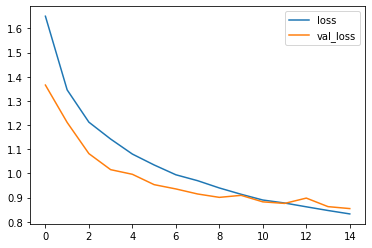

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

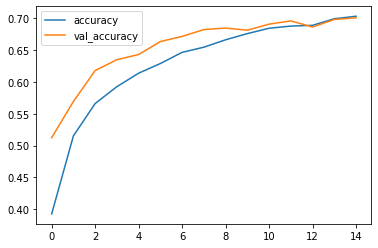

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 4s 14ms/step
[[769  14  29  11  16   4  11   7 102  37]
 [ 22 792   4   7   3   3   7   2  32 128]
 [ 86   6 518  77 158  48  46  21  24  16]
 [ 26  11  53 537 121 133  54  20  28  17]
 [ 30   4  38  67 751  13  24  53  15   5]
 [ 14   8  49 231  77 519  25  41  26  10]
 [  8   7  38  82 104  13 720   6  17   5]
 [ 16   1  24  57 100  44   7 718   6  27]
 [ 57  27   7  16   8   1   4   1 850  29]
 [ 28  61   6  17   8   2   9   6  35 828]]


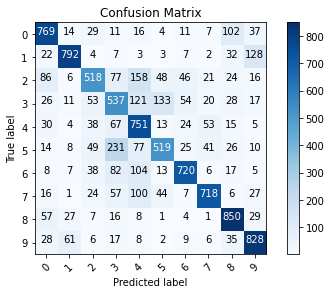

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues
                          ):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("normalized Confusion Matrix")
  print(cm)

  plt.imshow(cm, interpolation = "nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color = "white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
